In [191]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import networkx as nx

In [192]:
def michaelis_menten(x,a,b,ii):
    if ii ==0:
        assert((b == np.ones(a.shape)).all())
#     ar = np.array([np.sum([a[i,j]*x[:,i]*x[:,j]/(b[i,j] + ii*x[:,i]*x[:,j]) for j in range(a.shape[0])],1) for i in range(a.shape[0])]).T
    out2 = np.sum(np.array([[a[i,j]*x[:,i]*x[:,j]/(b[i,j] + ii*x[:,i]) for j in range(a.shape[0])] for i in range(a.shape[0])]),1)    
    return out2.T

In [193]:
def michaelis_menten2(x,a,b,ii):
    if ii ==0:
        assert((b == np.ones(a.shape)).all())
#     ar = np.array([np.sum([a[i,j]*x[:,i]*x[:,j]/(b[i,j] + ii*x[:,i]*x[:,j]) for j in range(a.shape[0])],1) for i in range(a.shape[0])]).T
    out2 =np.array([[(a[i,j]*x[:,i]*x[:,j]*b[i,j])/(b[i,j] + ii*x[:,i]) for j in range(a.shape[0])] for i in range(a.shape[0])])
    assert((np.diag(a)<0).all())
    for k in range(out2.shape[-1]):
        np.fill_diagonal(out2[:,:,k],np.array([a[i,i]*(x[:,i]**2) for i in range(a.shape[0])]))
    return np.sum(out2,1).T

In [194]:
def generate_data(a,b,r,resolution,ii,nsamps=1,time = 10,seed=4,xin = None):
    
    nptspersample = int(time/resolution)
    a2 = 0
    b2 = np.sum(b,1)
    # a2, b2 = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
    xtot = []
    for nn in range(nsamps):
        np.random.seed(seed)
        if xin is None:
            xin = st.truncnorm(a2,b2).rvs(size = (1,num_bugs))

        x_all = [xin]
        gx_all = [xin]
        for n in range(nptspersample):
            gxout = michaelis_menten2(xin,a,b,ii)
            gx_all.append(gxout)
            gxin = gxout

            xout = xin + resolution*(xin*r + michaelis_menten2(xin,a,b,ii))
            zidxs = np.where(xout < 0)
            xout[zidxs] = 0
            x_all.append(xout)
            xin = xout


        x_all = np.concatenate(x_all)
        xtot.append(x_all)
    return xtot

In [197]:
num_bugs = 3
nsamps = 2
nptspersample = 20
resolution = 0.01

mvar = 5
pvar = 1*resolution
gr = .2
time = 10

Simulation 1: 
- find the intial conditions where it's unstable for A = [[-1 0 1],[1 -1 1],[0 1 -1]]
- start with Kij = 0 / no denominator
- r = [2,2,2]

Kij should start at 1, then increase
Change eqn to be rij *kij*xi / (kij + xi)
(Reparameterisze r to be proportional to k)

Get lotka volterra to be unstable and then stabilize that through saturable lotka volterra

# Scenerio 1 - all cooperative

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


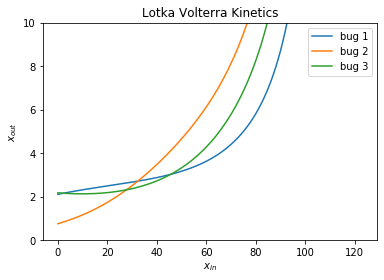

In [198]:
a = np.array([[-1, 0, 1],[1, -1, 1],[0, 1, -1]])
r = np.array([1,1,1])
b = np.ones(a.shape)

o = generate_data(a,b,r,resolution,0)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Lotka Volterra Kinetics')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
    plt.ylim([0,10])
plt.show()

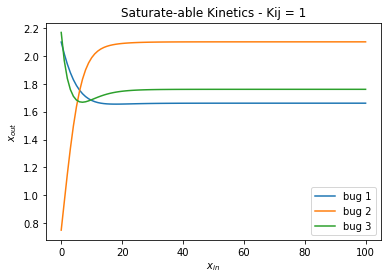

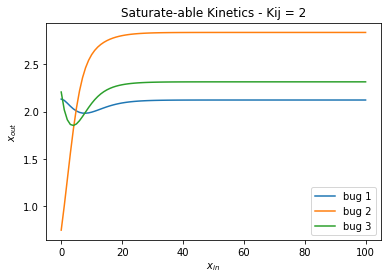

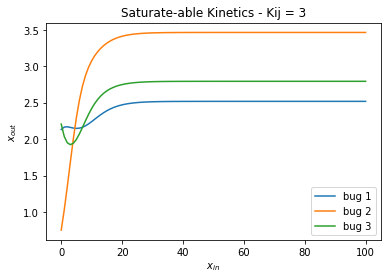

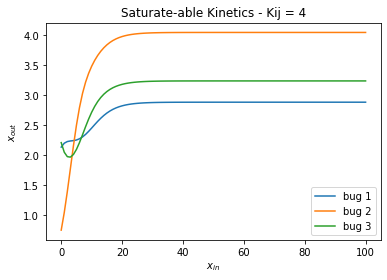

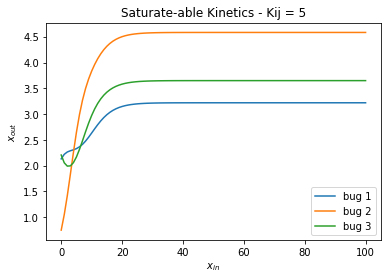

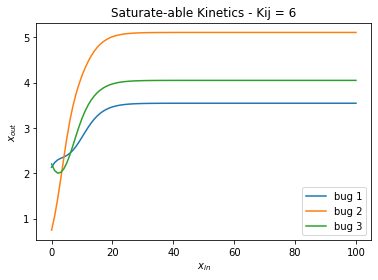

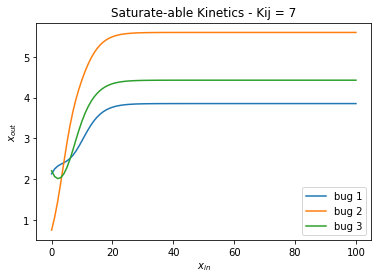

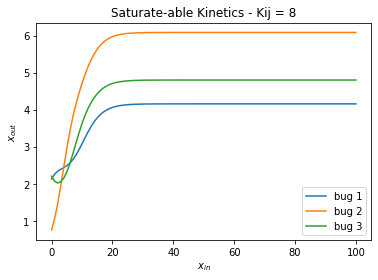

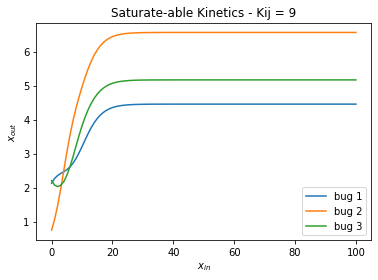

In [180]:
a = np.array([[-1, 0, 1],[1, -1, 1],[0, 1, -1]])
r = [1,1,1]
for bval in range(1,10):
    b = bval*np.ones(a.shape)

    o = generate_data(a,b,r,resolution,1)[0]
    for bb in range(num_bugs):
        plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
        plt.legend()
        plt.title('Saturate-able Kinetics - Kij = ' + str(bval))
        plt.xlabel(r'$x_{in}$')
        plt.ylabel(r'$x_{out}$')
    plt.show()

# Example 2 - Competing

In [201]:
resolution=.1

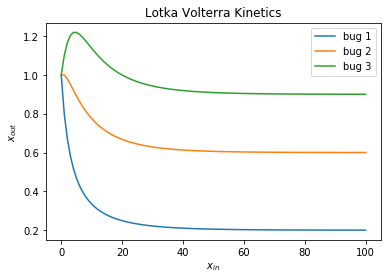

In [202]:
a = np.array([[-2, -1, 0],[1, -2, 0],[1, 1, -2]])
r = np.array([1,1,1])
b = np.ones(a.shape)

o = generate_data(a,b,r,resolution,0,xin = np.array([[1,1,1]]))[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Lotka Volterra Kinetics')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

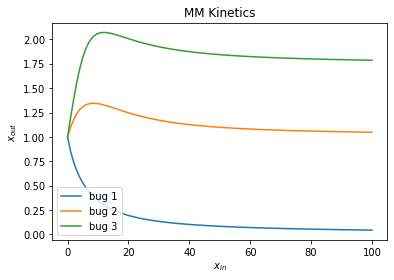

In [203]:
a = np.array([[-2, -1, 0],[2, -1, 0],[2, 2, -1]])
r = np.array([1,1,1])
b = np.ones(a.shape)

o = generate_data(a,b,r,resolution,1,4,xin = np.array([[1,1,1]]))[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('MM Kinetics')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

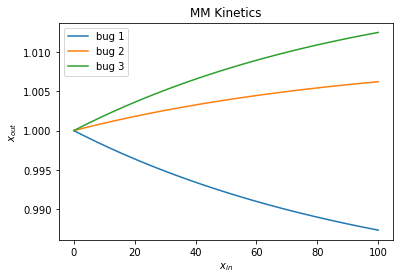

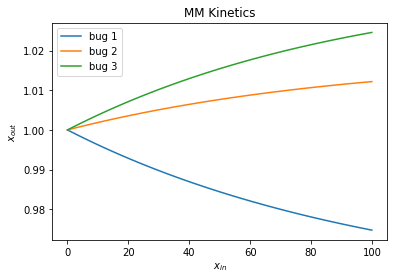

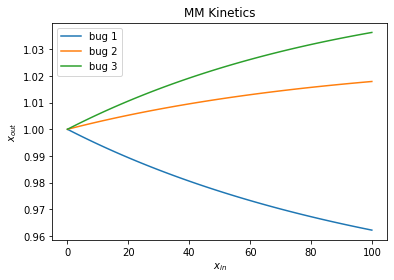

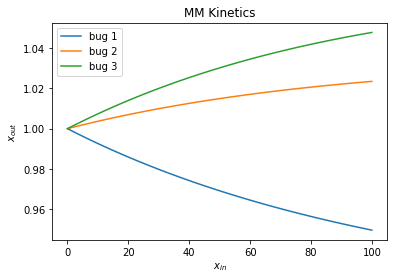

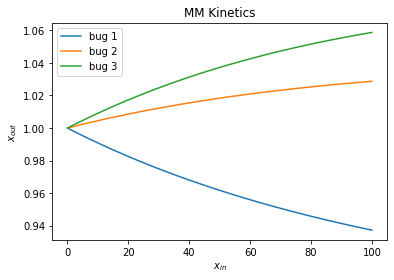

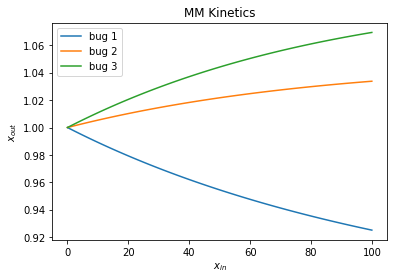

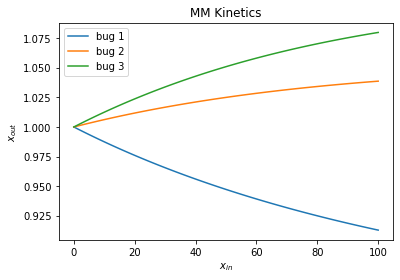

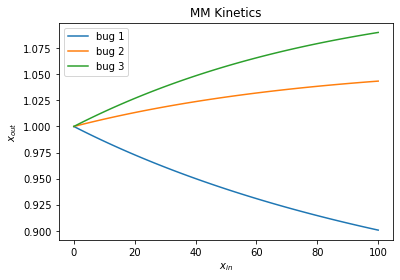

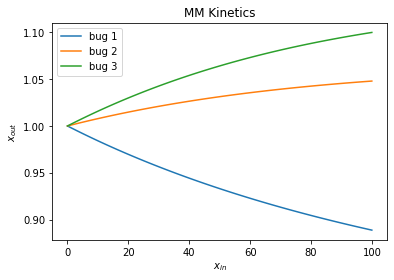

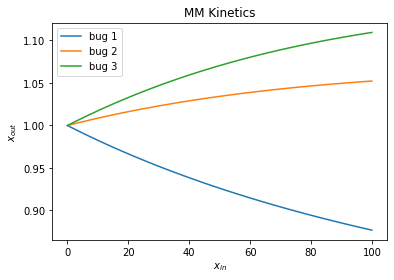

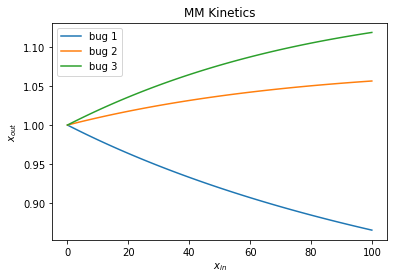

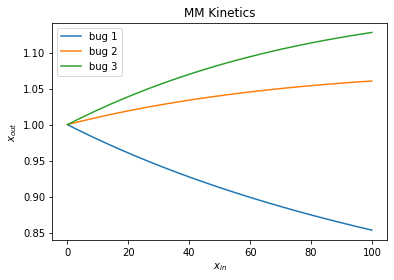

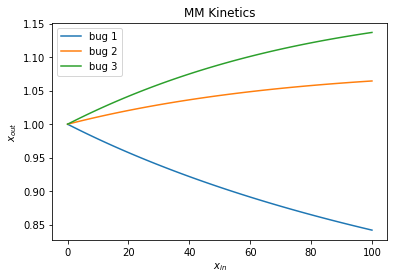

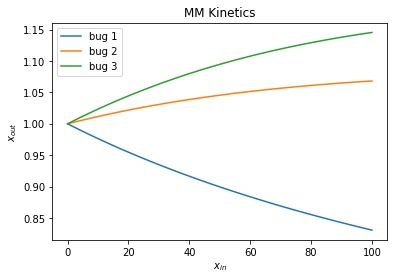

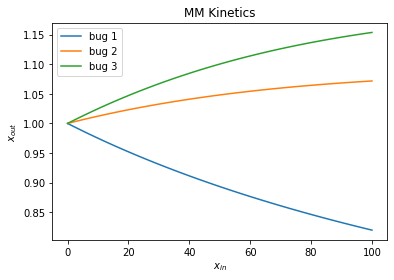

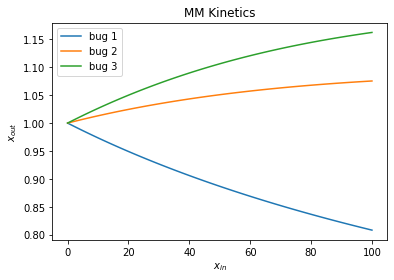

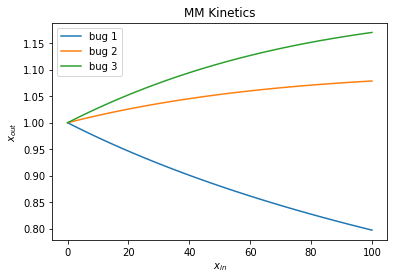

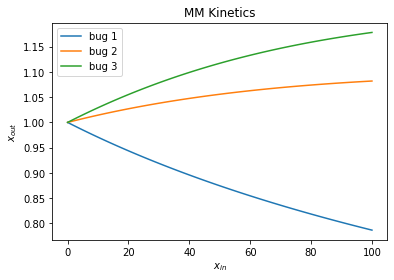

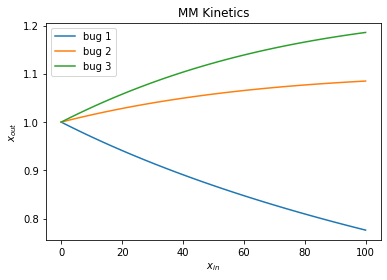

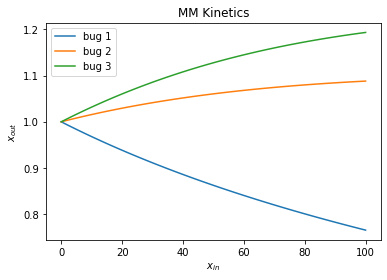

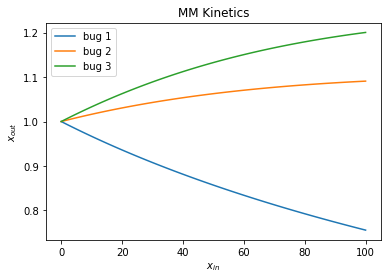

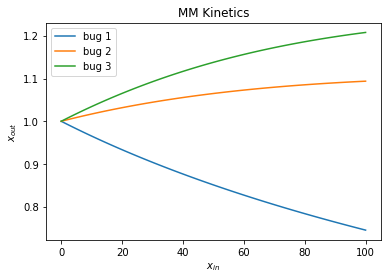

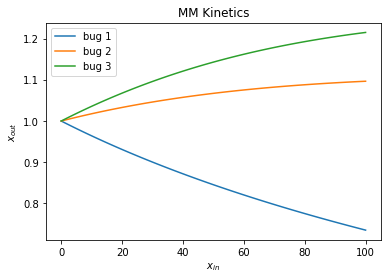

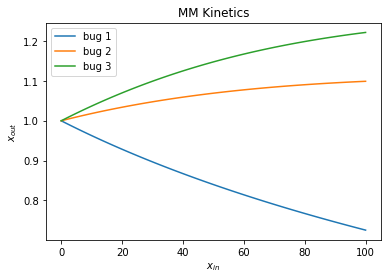

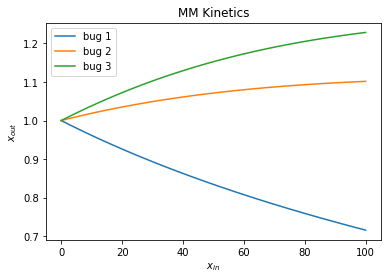

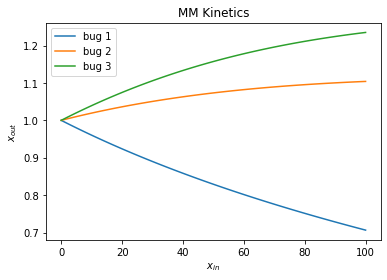

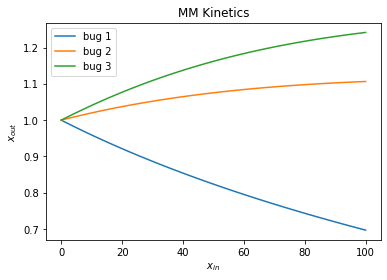

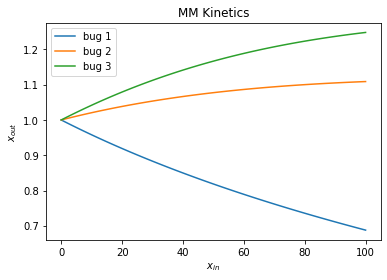

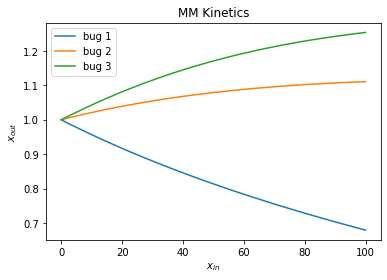

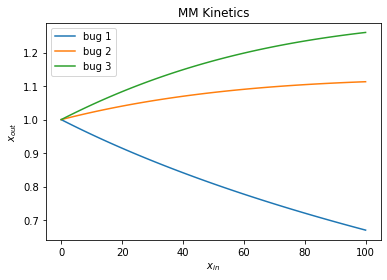

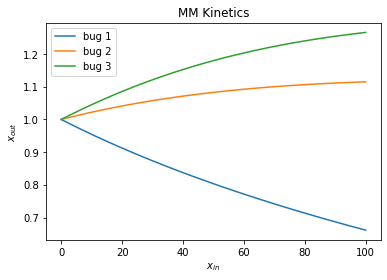

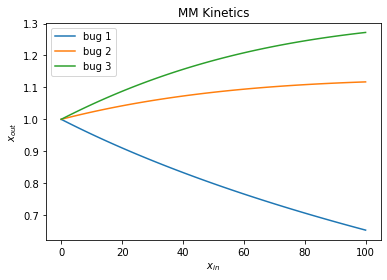

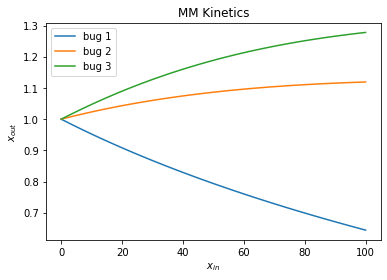

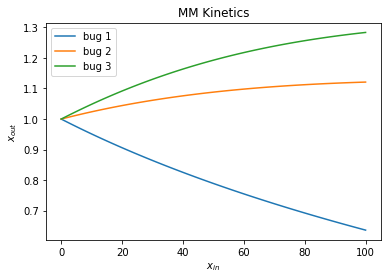

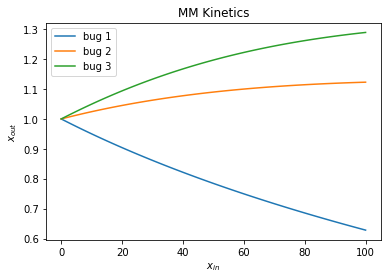

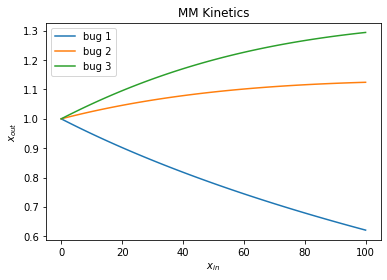

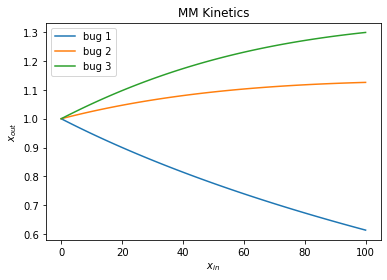

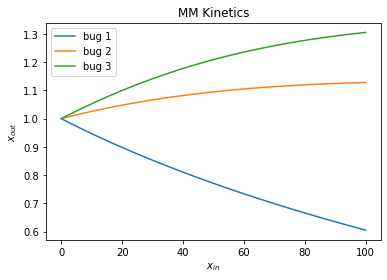

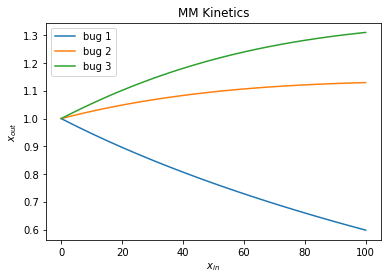

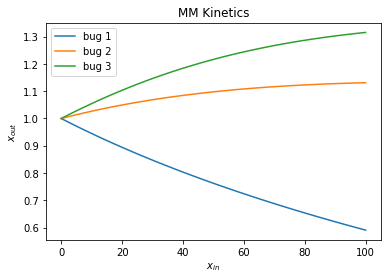

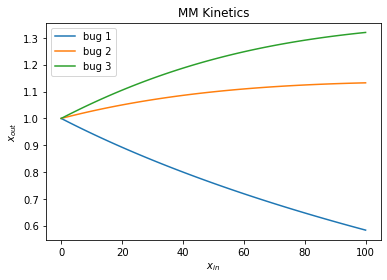

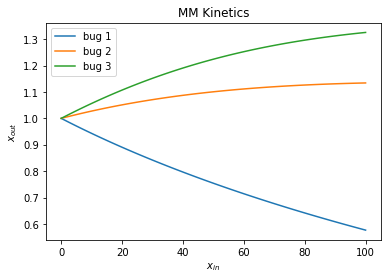

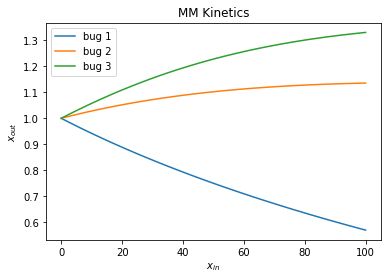

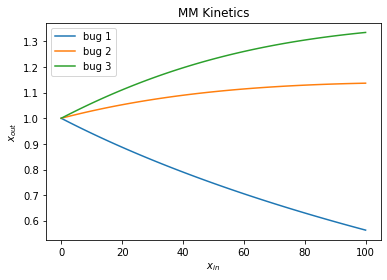

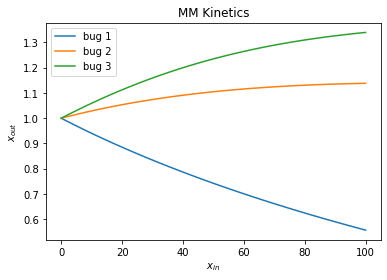

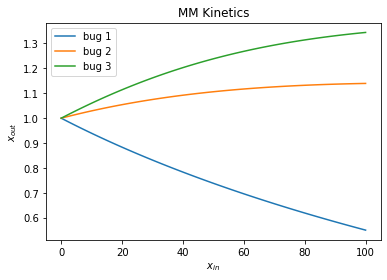

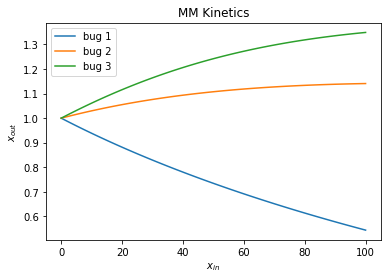

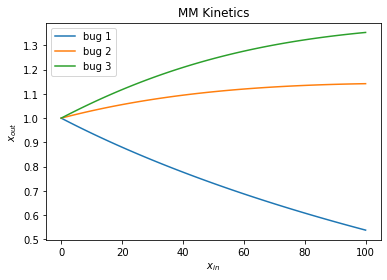

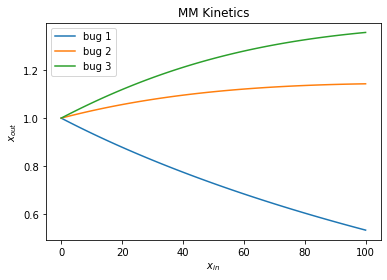

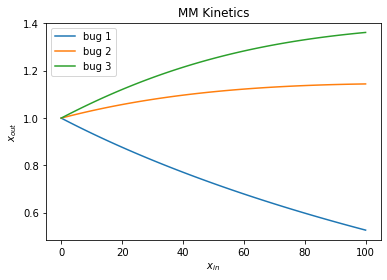

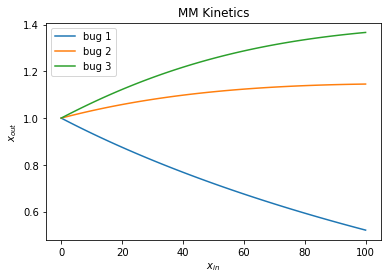

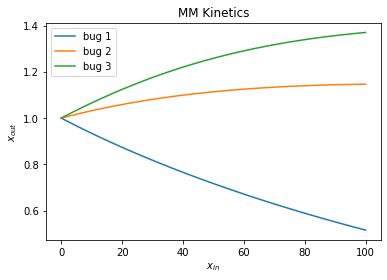

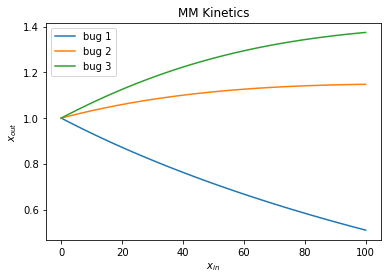

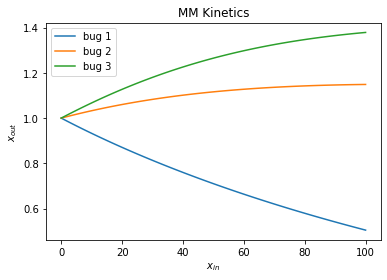

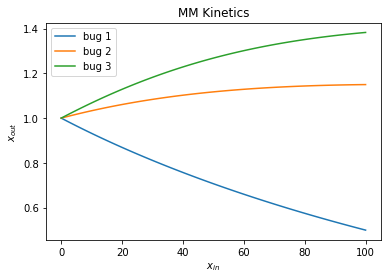

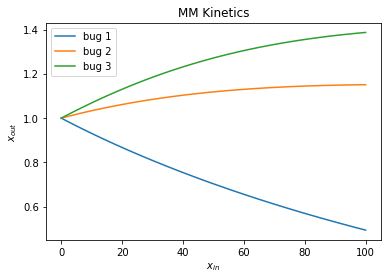

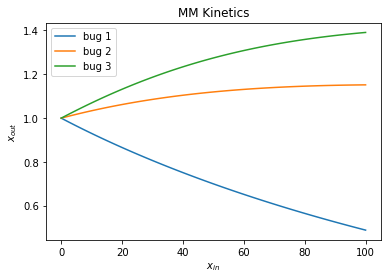

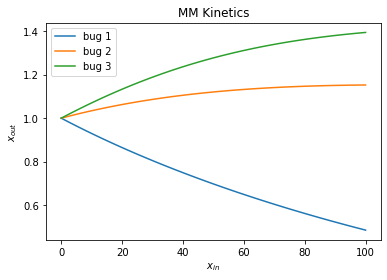

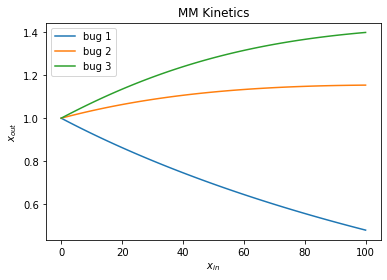

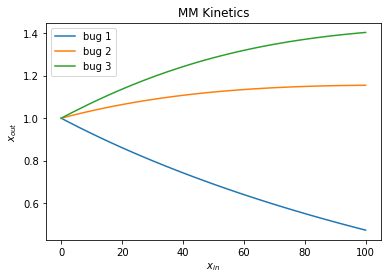

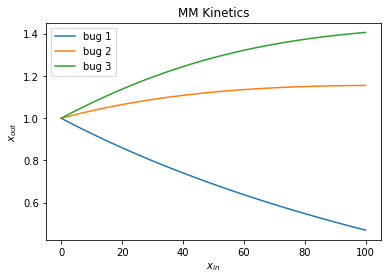

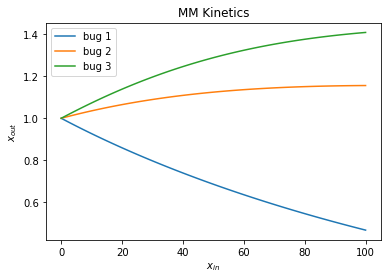

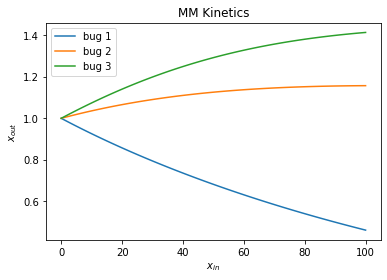

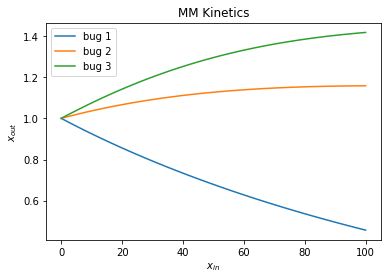

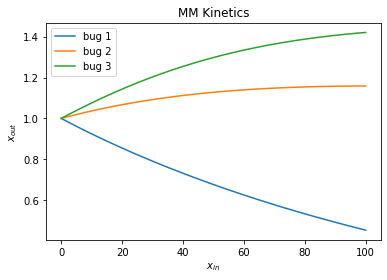

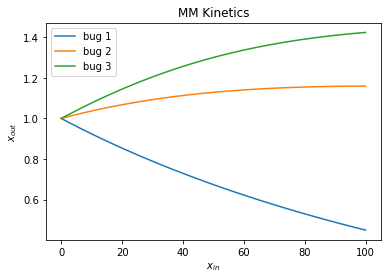

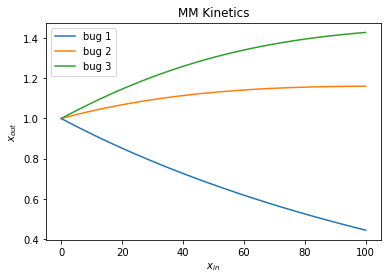

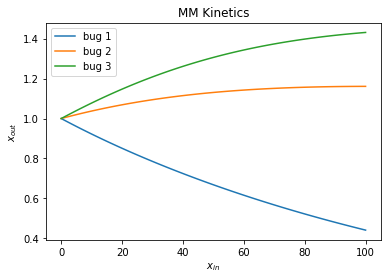

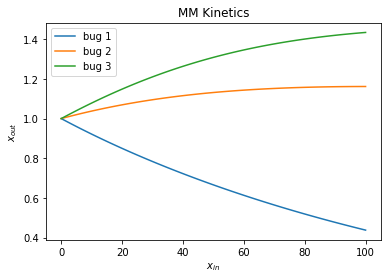

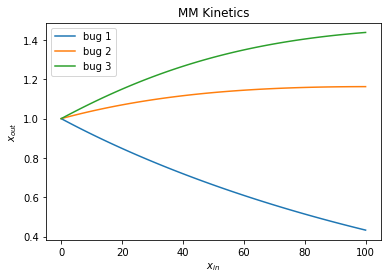

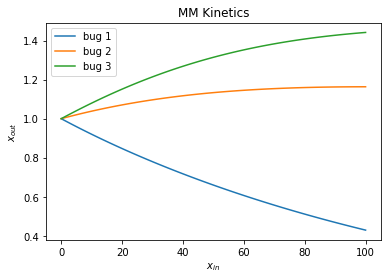

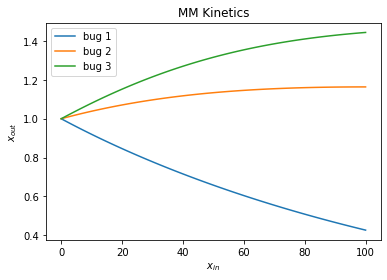

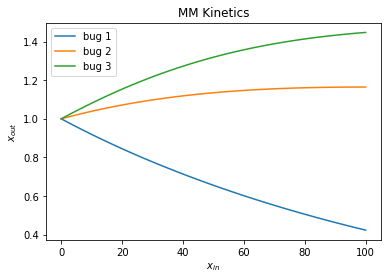

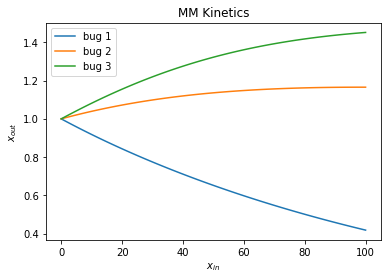

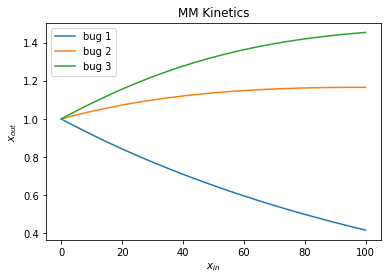

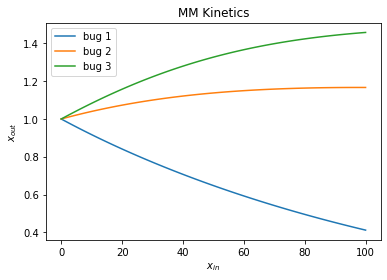

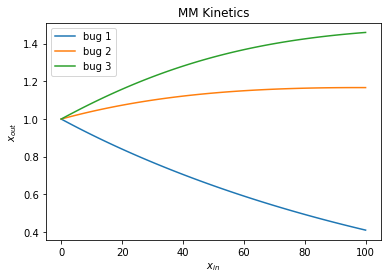

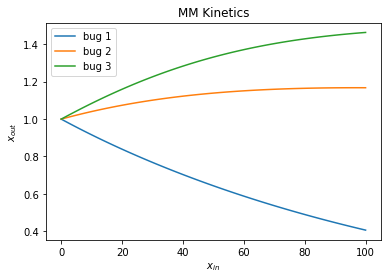

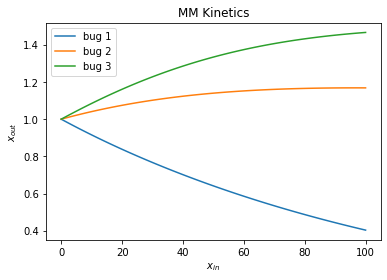

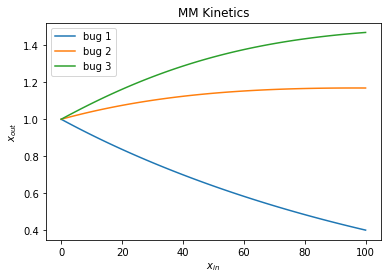

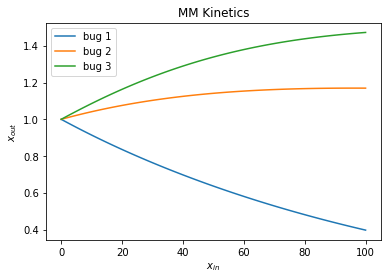

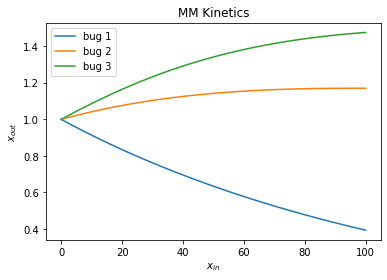

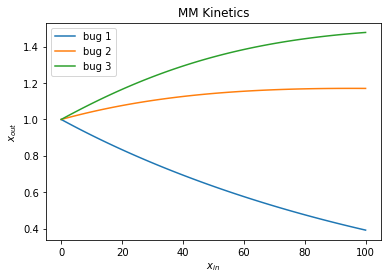

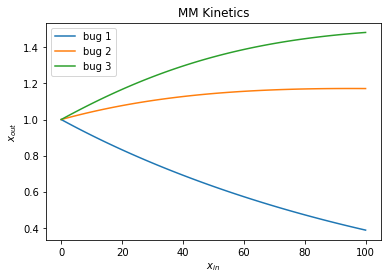

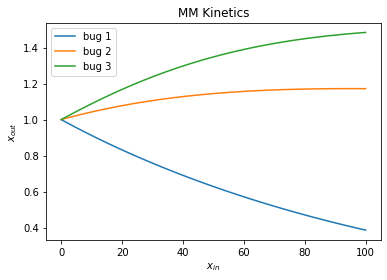

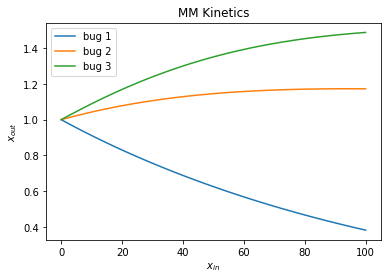

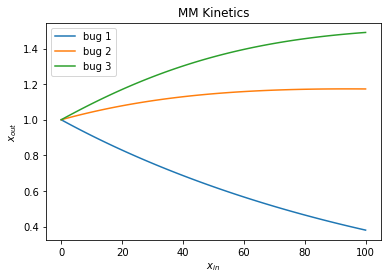

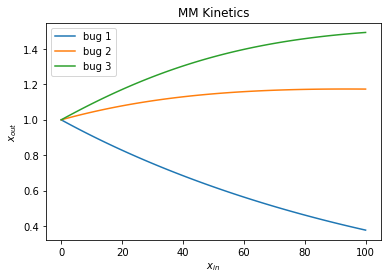

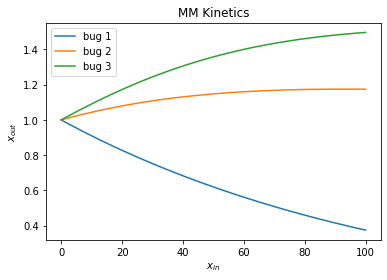

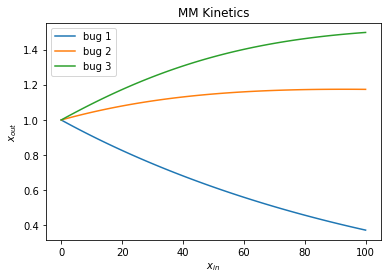

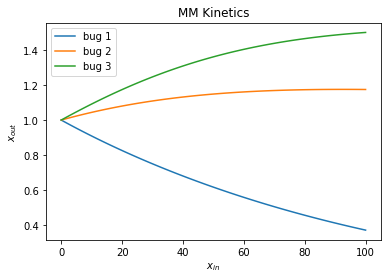

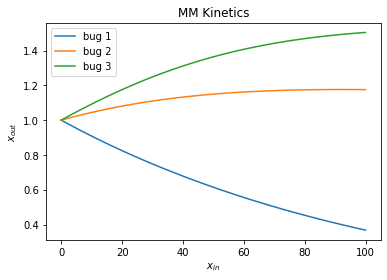

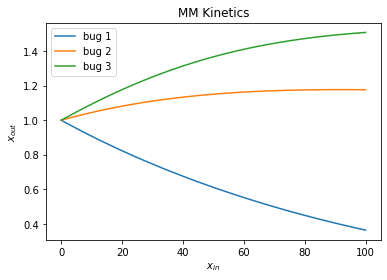

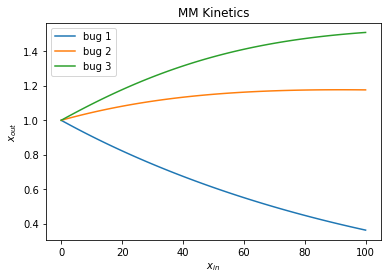

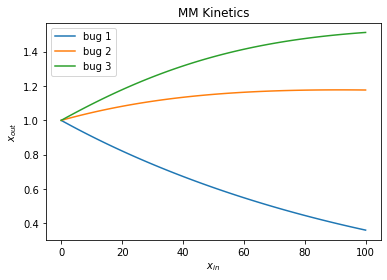

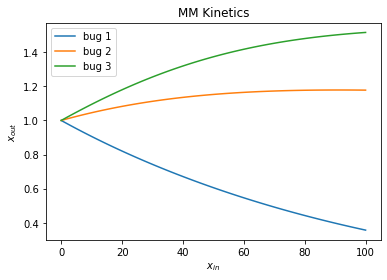

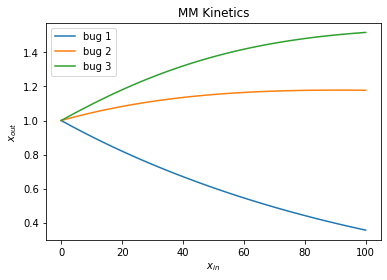

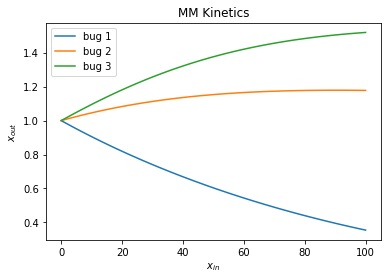

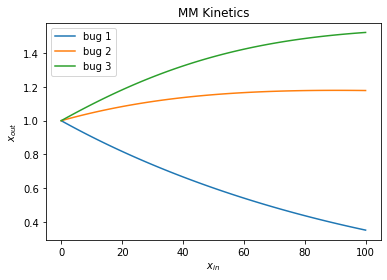

In [159]:
for bval in np.arange(.01,1,.01):
    a = np.array([[-1, 1, 1],[-2, -1, 1],[0, 0, -1]]).T
    r = np.array([1,1,1])
    b = bval*np.ones(a.shape)

    o = generate_data(a,b,r,resolution,1,1,100,4,xin = np.array([[1,1,1]]))[0]
    for bb in range(num_bugs):
        plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
        plt.legend()
        plt.title('MM Kinetics')
        plt.xlabel(r'$x_{in}$')
        plt.ylabel(r'$x_{out}$')
    plt.show()

## Example 1: 2 and 3 competing

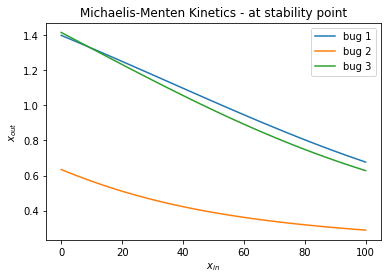

In [105]:
a = np.ones((num_bugs, num_bugs))
np.fill_diagonal(a, -3*np.diag(a))
a[1,2]= -a[1,2]
a[2,1] = -a[2,1]

b = .5*np.ones((num_bugs, num_bugs))

B = np.sum(b,1)
A = a
# X0 = [x[0,:] for x in out]
# xo = X0[0]
np.random.seed(0)
xo = np.random.rand(num_bugs)

r = -A@xo.T/(B + xo)

o = generate_data(a,b,r,resolution,1,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Michaelis-Menten Kinetics - at stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

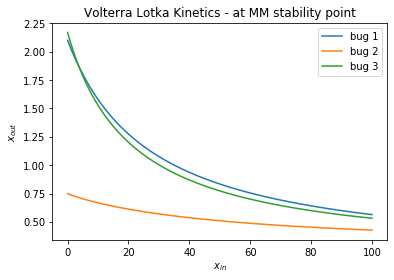

In [106]:
# r = -A@xo.T
o = generate_data(a,np.ones(a.shape),r,resolution,0,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Volterra Lotka Kinetics - at MM stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

# 2nd way

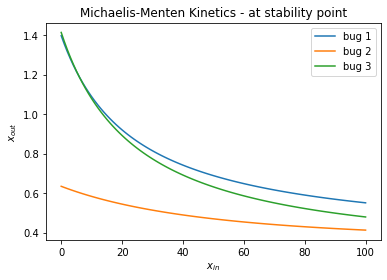

In [107]:
a = np.ones((num_bugs, num_bugs))
np.fill_diagonal(a, -3*np.diag(a))
a[1,2]= -a[1,2]
a[2,1] = -a[2,1]

b = .5*np.ones((num_bugs, num_bugs))

B = np.sum(b,1)
A = a
# X0 = [x[0,:] for x in out]
# xo = X0[0]
np.random.seed(0)
xo = np.random.rand(num_bugs)

r = -A@xo.T/(B + xo)

o = generate_data2(a,b,r,resolution,1,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Michaelis-Menten Kinetics - at stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

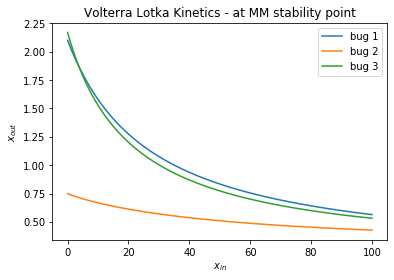

In [108]:
o = generate_data2(a,np.ones(a.shape),r,resolution,0,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Volterra Lotka Kinetics - at MM stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

# 1st way higher weight

In [109]:
r = r + 100

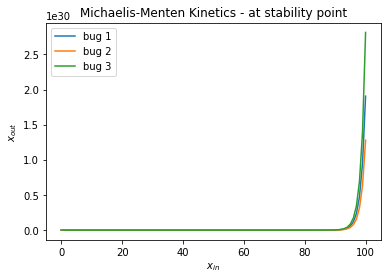

In [110]:
a = np.ones((num_bugs, num_bugs))
np.fill_diagonal(a, -3*np.diag(a))
a[1,2]= -a[1,2]
a[2,1] = -a[2,1]

b = .5*np.ones((num_bugs, num_bugs))

B = np.sum(b,1)
A = a
# X0 = [x[0,:] for x in out]
# xo = X0[0]
np.random.seed(0)
xo = np.random.rand(num_bugs)

# r = -A@xo.T/(B + xo)

o = generate_data(a,b,r,resolution,1,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Michaelis-Menten Kinetics - at stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

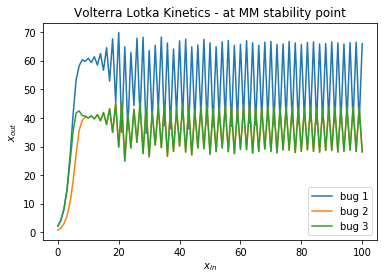

In [111]:
o = generate_data(a,np.ones(a.shape),r,resolution,0,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Volterra Lotka Kinetics - at MM stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

# 2nd way, higher weight

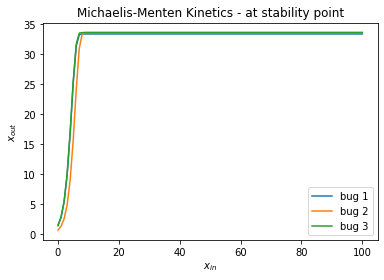

In [112]:
a = np.ones((num_bugs, num_bugs))
np.fill_diagonal(a, -3*np.diag(a))
a[1,2]= -a[1,2]
a[2,1] = -a[2,1]

b = .5*np.ones((num_bugs, num_bugs))

B = np.sum(b,1)
A = a
# X0 = [x[0,:] for x in out]
# xo = X0[0]
np.random.seed(0)
xo = np.random.rand(num_bugs)

# r = -A@xo.T/(B + xo)

o = generate_data2(a,b,r,resolution,1,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Michaelis-Menten Kinetics - at stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

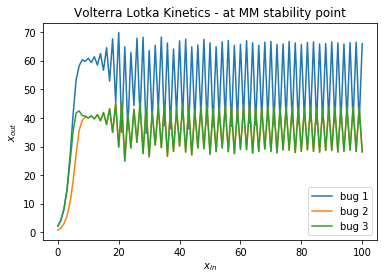

In [113]:
o = generate_data2(a,np.ones(a.shape),r,resolution,0,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Volterra Lotka Kinetics - at MM stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

## Example 2: All cooperative

In [114]:
np.random.seed(0)
xo = np.random.rand(num_bugs)

a = 1*np.ones(a.shape)
# np.fill_diagonal(a, -np.diag(a))
# a[1,2]= -a[1,2]
# a[2,1] = -a[2,1]

b = .5*np.ones(b.shape)
B = np.sum(b,1)
A = a

r = -A@xo.T/(B + xo)

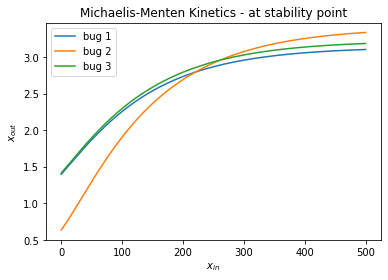

In [115]:
o = generate_data(a,b,r,resolution,1,1,500,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Michaelis-Menten Kinetics - at stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


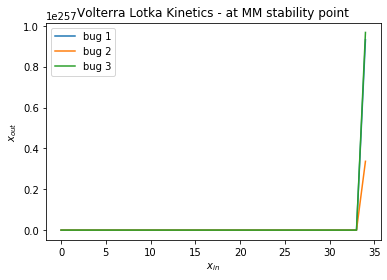

In [116]:
o = generate_data(a,np.ones(a.shape),r,resolution,0,1,50,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Volterra Lotka Kinetics - at MM stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

In [117]:
# higher rate

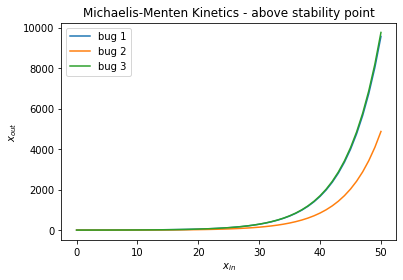

In [125]:
r = r + 10
o = generate_data(a,b,r,resolution,1,1,50,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Michaelis-Menten Kinetics - above stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


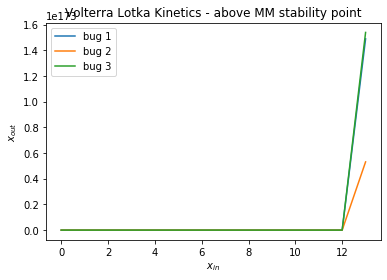

In [119]:
o = generate_data(a,np.ones(a.shape),r,resolution,0,1,50,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Volterra Lotka Kinetics - above MM stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

# New method

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


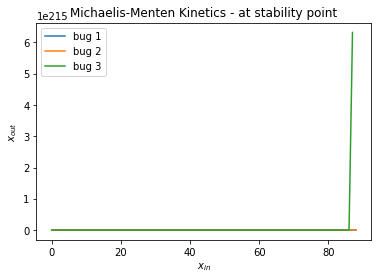

In [120]:
a = np.ones((num_bugs, num_bugs))

b = .5*np.ones((num_bugs, num_bugs))

B = np.sum(b,1)
A = a
# X0 = [x[0,:] for x in out]
# xo = X0[0]
np.random.seed(0)
xo = np.random.rand(num_bugs)

r = -A@xo.T/(B + xo)

o = generate_data2(a,b,r,resolution,1,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Michaelis-Menten Kinetics - at stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


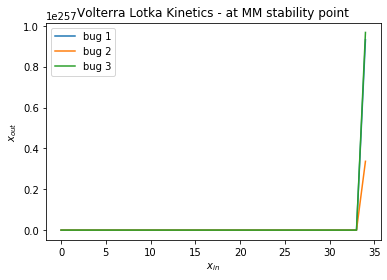

In [121]:
o = generate_data2(a,np.ones(a.shape),r,resolution,0,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Volterra Lotka Kinetics - at MM stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

In [122]:
# higher rate

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


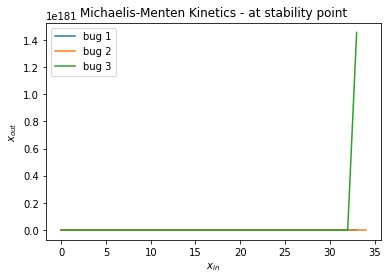

In [123]:
r = r + 10

o = generate_data2(a,b,r,resolution,1,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Michaelis-Menten Kinetics - at stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


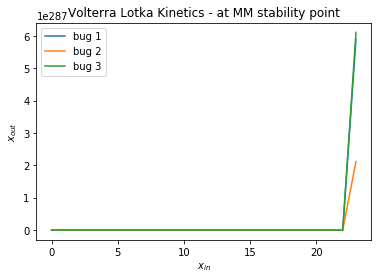

In [124]:
o = generate_data2(a,np.ones(a.shape),r,resolution,0,1,100,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Volterra Lotka Kinetics - at MM stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


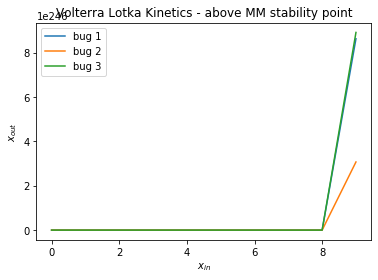

In [364]:
r = -A@xo.T 
o = generate_data(a,np.ones(a.shape),r,resolution,0,1,50,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('Volterra Lotka Kinetics - above MM stability point')
    plt.xlabel(r'$x_{in}$')
    plt.ylabel(r'$x_{out}$')
plt.show()

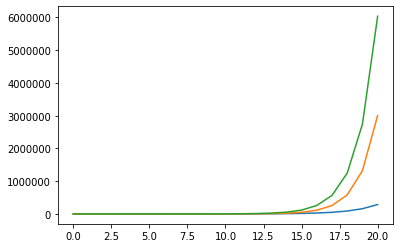

In [325]:
B = np.sum(b,1)
A = a
X0 = [x[0,:] for x in out]
xo = X0[0]

r = -A@xo.T/(B + xo) + 100

o = generate_data(a,b,r,resolution,1,1,nptspersample,4)[0]
for bb in range(num_bugs):
    plt.plot(o[:,bb],label = 'bug ' + str(bb+1))

In [313]:
out = []
for aa in np.arange(10,100,10):
    a = aa*np.ones(a.shape)
    np.fill_diagonal(a, -np.diag(a))
    a[1,2]= -a[1,2]
    a[2,1] = -a[2,1]
    o = generate_data(a,b,r,resolution,1,1,nptspersample,4)[0]
    out.append(o)

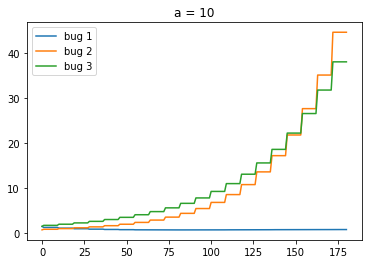

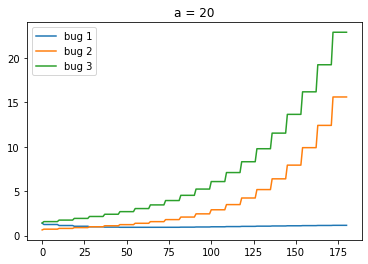

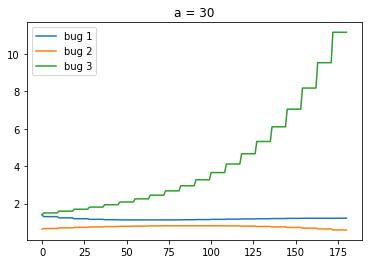

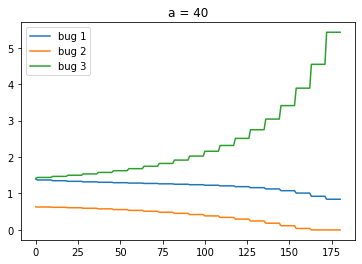

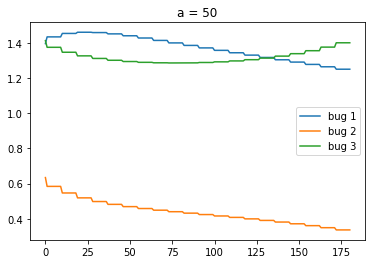

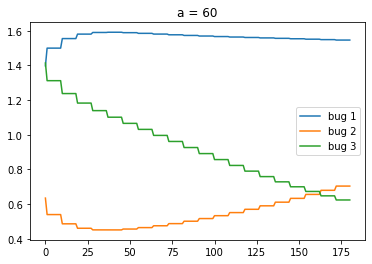

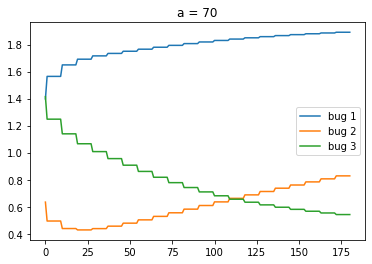

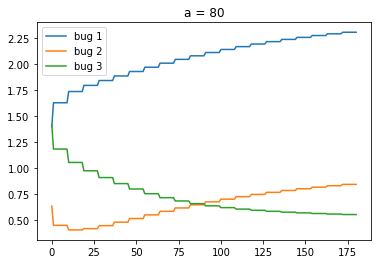

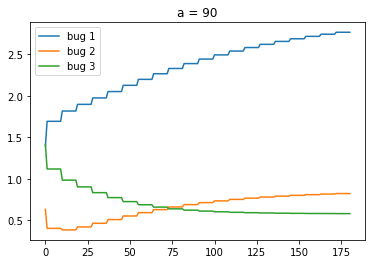

In [314]:
aavec = np.arange(10,100,10)
for i,x_all in enumerate(out):
    plt.figure()
    for bb in range(num_bugs):
        plt.plot(x_all[:,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.title('a = ' + str(aavec[i]))
    plt.show()

In [ ]:
def michaelis_menten(x,a,b,ii):
    if ii ==0:
        assert((b == np.ones(a.shape)).all())
#     ar = np.array([np.sum([a[i,j]*x[:,i]*x[:,j]/(b[i,j] + ii*x[:,i]*x[:,j]) for j in range(a.shape[0])],1) for i in range(a.shape[0])]).T
    out2 = np.sum(np.array([[a[i,j]*x[:,i]*x[:,j]/(b[i,j] + ii*x[:,i]*x[:,j]) for j in range(a.shape[0])] for i in range(a.shape[0])]),1)    
    import pdb; pdb.set_trace()
    return out2.T

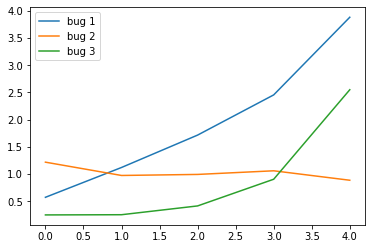

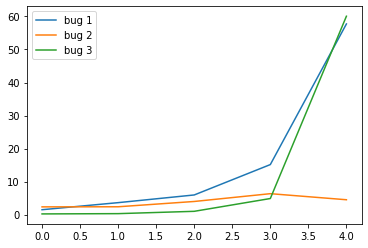

In [232]:
for x_all in out_2:
    plt.figure()
    for bb in range(num_bugs):
        plt.plot(x_all[:5,bb],label = 'bug ' + str(bb+1))
    plt.legend()
    plt.show()

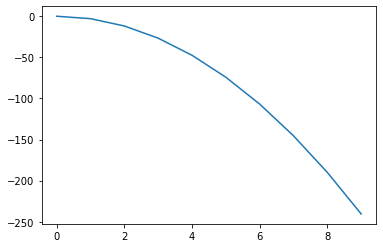

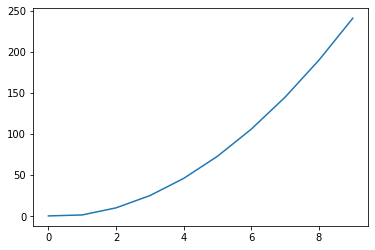

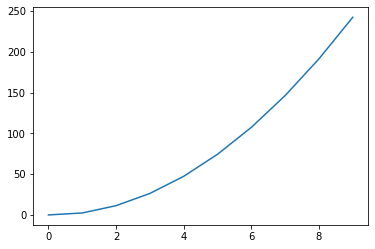

In [37]:
for i in range(num_bugs):
    plt.figure()
    plt.plot(x[:,i],out[:,i])

In [27]:
for i in range(num_bugs):
    for j in range(num_bugs):
        mm[:,i,j] = x[:,i]*x[:,j] + dt*(a[i,j]*x[:,i]*x[:,j])/(b[i,j] + i*x[:,i]*x[:,j]

SyntaxError: unexpected EOF while parsing (<ipython-input-27-7ca3a004c8d5>, line 4)

In [24]:
x1 = np.arange(10)
x2 = np.arange(10)
x3 = np.arange(10)
xall = np.vstack((x1,x2,x3)).T
out = michaelis_menten(xall,a,b,resolution,1)
out2 = np.array([[a[i,j]*x[:,i]*x[:,j]/(b[i,j] + ii*x[:,i]*x[:,j]) for j in range(a.shape[0])] for i in range(a.shape[0])])

(3, 3)

In [ ]:
def generate_data4D(a, b, mvar, pvar, xrange, gr=.1, nsamples=25, nptspersample=20, num_bugs=3, resolution=.1):
    t = np.linspace(- np.abs(xrange)/2, np.abs(xrange) /
                    2, np.abs(xrange)/resolution)

    f = [[sigmoid(t, a[i, j], b[i, j]) - xrange/2 for i in range(a.shape[0])]
         for j in range(a.shape[1])]
    f = np.array(f)
    xvec = []
    yvec = []
    ns = 0
    while ns < nsamples:
        xin = [(f.max()-f.min())*np.random.rand() + f.min()]
        # xout = []
        xall = []
        xin = (f.max(1).max(1) - f.min(1).min(1)) * \
            np.random.rand(a.shape[1]) + f.min(1).min(1)
        for iterate in range(nptspersample):
            xout = np.zeros((a.shape[0]))
            for i in range(a.shape[0]):
                xout[i] = xin[i] + resolution*(gr*xin[i] + np.sum(
                    [sigmoid(xin[i]*xin[j], a[i, j], b[i, j]) for j in range(a.shape[1])]))
            xall.append(xout)
            xin = xout

        xall = np.array(xall)
        y = xall + np.random.normal(0, np.sqrt(mvar), size=xall.shape)
        if np.var(xin)/np.var(y) > .5:
            ns += 1
            xvec.append(xall)
            yvec.append(y)

    xvec = np.array(xvec)
    yvec = np.array(yvec)
    # import pdb; pdb.set_trace()
    return xvec, yvec, t, f

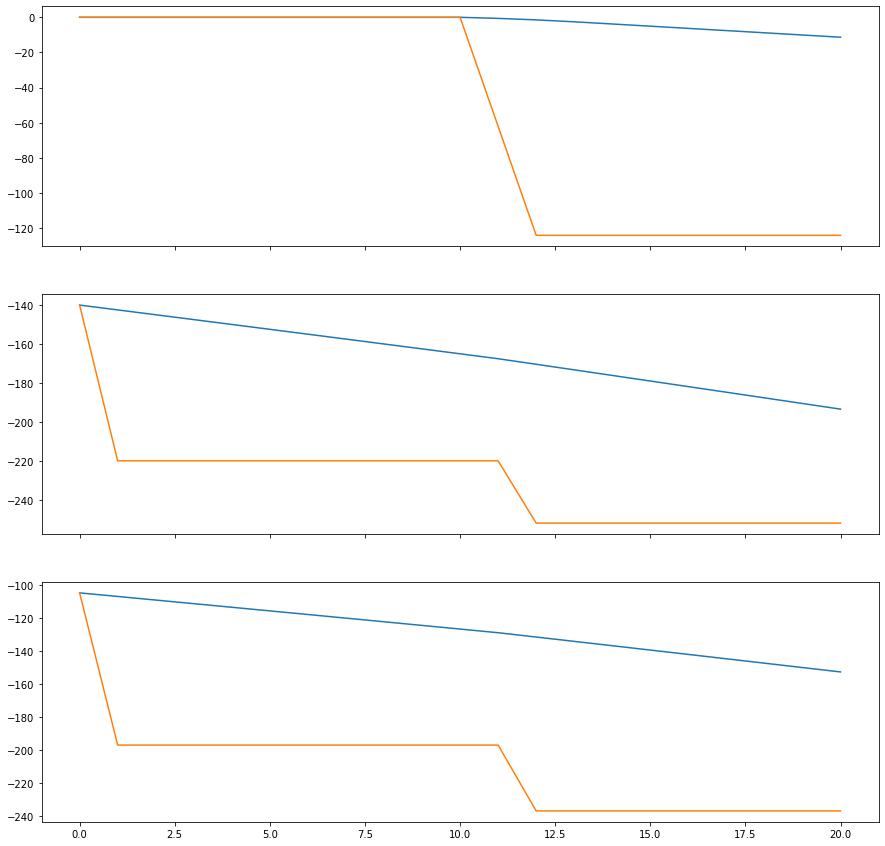

In [121]:
fig, axes = plt.subplots(num_bugs, 1, sharex = True, figsize = (15,15))
for i in range(num_bugs):
    axes[i].plot(xall[:,i])
    axes[i].plot(gall[:,i])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


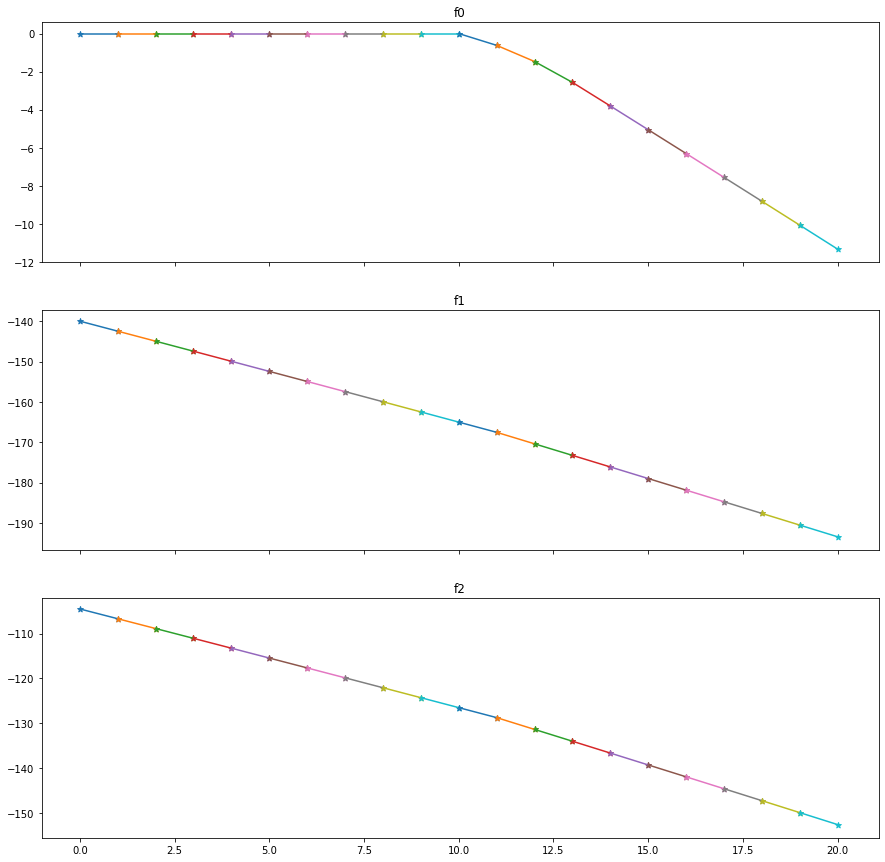

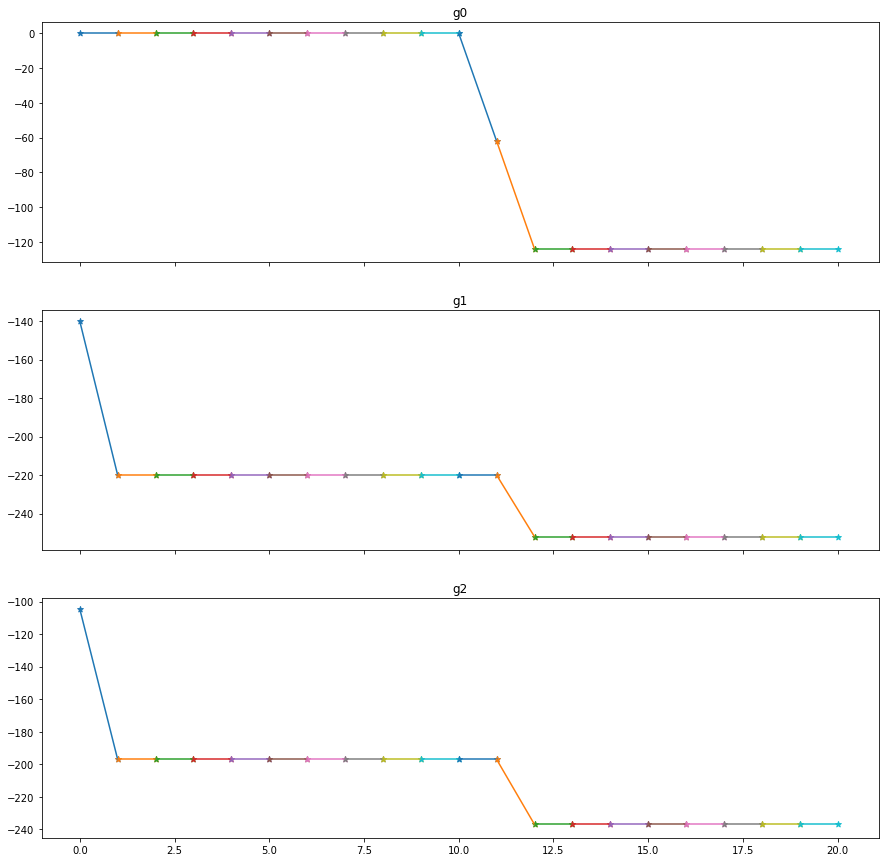

In [119]:
np.random.seed(1)

t = np.linspace(- np.abs(xrange)/2, np.abs(xrange) /
            2, np.abs(xrange)/resolution)

f = [[sigmoid(t, a[i, j], b[i, j]) - xrange/2 for i in range(a.shape[0])]
     for j in range(a.shape[1])]
f = np.array(f)

xin = [(f.max()-f.min())*np.random.rand() + f.min()]
# xout = []
xall = []
xin = (f.max(1).max(1) - f.min(1).min(1)) * \
    np.random.rand(a.shape[1]) + f.min(1).min(1)

xin[0] = 0
xall = [xin]
gall = [xin]

xin2 = np.expand_dims(xin,0)
gxin = np.expand_dims(xin,0)
fig, axes = plt.subplots(num_bugs, 1, sharex = True, figsize = (15,15))
fig3, axes3 = plt.subplots(num_bugs, 1, sharex = True, figsize = (15,15))
for iterate in range(nptspersample):
    xout = np.zeros((a.shape[0]))
    gxout =np.zeros((1,a.shape[0])).copy()
    for i in range(a.shape[0]):
        if iterate < 10 and i ==0:
            xout[i] = 0
            gxout[:,i] = 0
        else:
            xout[i] = xin[i] + resolution*(gr*xin[i] + np.sum(
                [sigmoid(xin[i]*xin[j], a[i, j], b[i, j]) for j in range(a.shape[1])]))
            gxout[:,i] = sigmoid2d(gxin, a, b)[0][i]
            
        axes[i].scatter([iterate,iterate+1],[xin[i],xout[i]],marker='*')
        axes[i].plot([iterate,iterate+1],[xin[i],xout[i]])
        
        axes3[i].scatter([iterate,iterate+1],[gxin[:,i],gxout[:,i]],marker='*')
        axes3[i].plot([iterate,iterate+1],[gxin[:,i],gxout[:,i]])
#         for j in range(a.shape[1]):
#             lines = [sigmoid(xin[i]*xin[j], a[i, j], b[i, j]), sigmoid(xout[i]*xout[j], a[i, j], b[i, j])]
#             axes2[i,j].plot([iterate,iterate+1], lines)
#             axes2[i,j].scatter(iterate, lines[0])
#     plt.pause(.5)
    
        axes[i].set_title('f' +  str(i))
        axes3[i].set_title('g' + str(i))
    
    xall.append(xout)
    gall.append(gxout.squeeze())
    xin = xout
    gxin = gxout
plt.show()
xall = np.array(xall)
gall = np.array(gall)
y = xall + np.random.normal(0, np.sqrt(mvar), size=xall.shape)
# if np.var(xin)/np.var(y) > .5:
#     ns += 1
#     xvec.append(xall)
#     yvec.append(y)



In [106]:
def sigmoid2d(x,a,b):
    ar = np.array([np.sum([sigmoid(x[:, i]*x[:, j],a[i,j],b[i,j]) for j in range(a.shape[1])], 0) for i in range(a.shape[0])]).T
    return ar

In [105]:
def sigmoid(t, yscale=20, xscale=.1):
    y = yscale/(1+np.exp(-xscale*(t)))
    return y

In [104]:
num_bugs = 3
a = -np.random.randint(10,100,size = (num_bugs, num_bugs))
b = np.random.rand(num_bugs, num_bugs)
nsamples = 1
nptspersample = 20
resolution = 0.01

mvar = 5
pvar = 1*resolution
xrange = max(abs(a.flatten()))
gr = .2

In [118]:
gxout.shape

(1, 3)

In [80]:
[gxin[i],gxout[i]]

[array([0., 0., 0.]), array([-54.5, -54.5, -54.5])]

In [77]:
xout2[:,i]

array([0.])

In [88]:
xout2.squeeze().shape

(3,)

In [66]:
xin.shape

(3,)